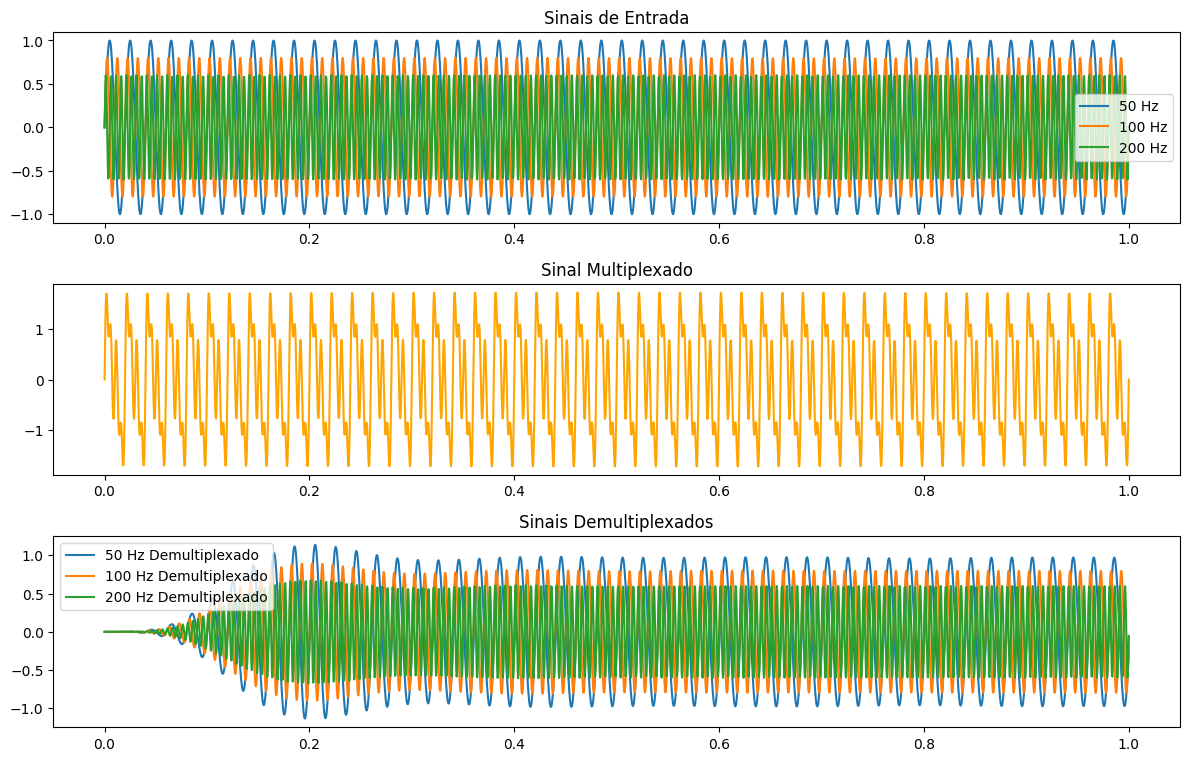

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Configurações iniciais
sampling_rate = 2500  # Taxa de amostragem em Hz
t = np.linspace(0, 1, sampling_rate)  # Vetor de tempo para 1 segundo

# Função para gerar sinais senoidais
def generate_signal(freq, amplitude=1.0):
    return amplitude * np.sin(2 * np.pi * freq * t)

# Geração dos sinais de entrada
signal1 = generate_signal(50, amplitude=1.0)   # Sinal de 50 Hz
signal2 = generate_signal(100, amplitude=0.8)  # Sinal de 100 Hz
signal3 = generate_signal(200, amplitude=0.6)  # Sinal de 200 Hz

# Multiplexação: soma dos sinais
multiplexed_signal = signal1 + signal2 + signal3

# Função para aplicar filtro passa-faixa
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Demultiplexação: Aplicar filtros passa-faixa
demux_signal1 = bandpass_filter(multiplexed_signal, 45, 55, sampling_rate)
demux_signal2 = bandpass_filter(multiplexed_signal, 95, 105, sampling_rate)
demux_signal3 = bandpass_filter(multiplexed_signal, 195, 205, sampling_rate)

# Visualização
plt.figure(figsize=(12, 10))

# Sinais de entrada
plt.subplot(4, 1, 1)
plt.title("Sinais de Entrada")
plt.plot(t, signal1, label="50 Hz")
plt.plot(t, signal2, label="100 Hz")
plt.plot(t, signal3, label="200 Hz")
plt.legend()

# Sinal Multiplexado
plt.subplot(4, 1, 2)
plt.title("Sinal Multiplexado")
plt.plot(t, multiplexed_signal, color='orange')

# Sinais Demultiplexados
plt.subplot(4, 1, 3)
plt.title("Sinais Demultiplexados")
plt.plot(t, demux_signal1, label="50 Hz Demultiplexado")
plt.plot(t, demux_signal2, label="100 Hz Demultiplexado")
plt.plot(t, demux_signal3, label="200 Hz Demultiplexado")
plt.legend()

plt.tight_layout()
plt.show()
